In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
exam = pd.read_csv('exams.csv')

exam.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
21,male,group C,some college,free/reduced,completed,67,74,74
69,male,group E,associate's degree,free/reduced,completed,69,57,64
95,male,group C,some high school,free/reduced,none,55,47,39
14,male,group C,master's degree,standard,none,80,81,76
56,male,group D,bachelor's degree,standard,none,90,78,77


In [27]:
exam.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


In [28]:
from sklearn import preprocessing

#Standardize a dataset to have 0 mean and unit variance i.e variance of 1
#this allows us to compare values accross different distributions
#Substract the mean divide by the standard deviation (Xi - x.mean/stdev)

exam[['math score']] = preprocessing.scale(exam[['math score']].astype('float64'))
exam[['reading score']] = preprocessing.scale(exam[['reading score']].astype('float64'))
exam[['writing score']] = preprocessing.scale(exam[['writing score']].astype('float64'))

In [29]:
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,0.210248,0.440580,-0.009452
1,female,group C,some college,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,high school,standard,none,0.531729,0.147836,-0.076964
3,female,group B,some college,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,bachelor's degree,standard,completed,0.017360,0.440580,0.733181


In [30]:
exam.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.642331e-16,-3.048950e-16,-4.468648e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


In [31]:
exam['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [45]:
#Categorical values has to convert into numeric form before we use it in our ML model

parental_leval_of_education = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

In [46]:
label_encoding = preprocessing.LabelEncoder()



In [47]:
label_encoding = label_encoding.fit(parental_leval_of_education)

In [50]:
exam['parental level of education'] = label_encoding.transform(exam['parental level of education'].astype(str))

In [55]:
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,0,standard,none,0.210248,0.440580,-0.009452
1,female,group C,4,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,2,standard,none,0.531729,0.147836,-0.076964
3,female,group B,4,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,1,standard,completed,0.017360,0.440580,0.733181


In [56]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [57]:
#Categorical value with no intrinsic order can be converted into numeric values using one-hot encoding

exam  = pd.get_dummies(exam, columns=['race/ethnicity'])

In [58]:
exam.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,0.210248,0.440580,-0.009452,0,0,0,0,1
1,female,4,standard,none,-1.268562,-1.315885,-1.292181,0,0,1,0,0
2,male,2,standard,none,0.531729,0.147836,-0.076964,0,0,0,0,1
3,female,4,free/reduced,completed,-1.461450,-1.315885,-1.022132,0,1,0,0,0
4,female,1,standard,completed,0.017360,0.440580,0.733181,0,1,0,0,0


In [59]:
# Lets perform one-hot encoding for other categorical values

exam = pd.get_dummies(exam, columns = ['gender','lunch','test preparation course'])

In [60]:
exam.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,0,0,0,0,1,1,0,0,1,0,1
1,4,-1.268562,-1.315885,-1.292181,0,0,1,0,0,1,0,0,1,0,1
2,2,0.531729,0.147836,-0.076964,0,0,0,0,1,0,1,0,1,0,1
3,4,-1.461450,-1.315885,-1.022132,0,1,0,0,0,1,0,1,0,1,0
4,1,0.017360,0.440580,0.733181,0,1,0,0,0,1,0,0,1,1,0


In [78]:
X = exam.drop('math score', axis=1)
Y = exam['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [79]:
#We have used one-hot encoding for the features and have explicitly set fit_intercept=True
#This might cause us to encounter perfect collinearity in our model

#The dummy variable trap occurs when there is perfect collinearity between two variables that we have used in 
#our models. This trap is encountered if we fit an intercept on our linear model and we use all of the column
# from our one hot encoded variable

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [80]:
print('Training score : ', linear_model.score(x_train, y_train))

Training score :  0.8886057439894263


In [81]:
y_pred = linear_model.predict(x_test)

In [82]:
print('Testing Score : ', r2_score(y_test, y_pred))

Testing Score :  0.8652853649567197


In [96]:
#Lets try intercept with false

linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [97]:
print('Training score : ', linear_model.score(x_train, y_train))

Training score :  0.8886057439894263


In [98]:
y_pred = linear_model.predict(x_test)

In [99]:
print('Testing Score : ', r2_score(y_test, y_pred))

Testing Score :  0.8652853649567167


When you use one-hot encoding the Scikit-learn regressor accounts for the intercept when using one-hot encoding.
The LinearRegression object will make sure that fit.intercept = False under the hood so that you don't fall into the dummy variable trap

In [101]:
#Lets set up a dataframe with the actual versus predicted values

pred_actual = pd.DataFrame ({'predicted' : y_pred, 'actual' : y_test})
pred_actual.head(10)

,predicted,actual
27,0.507096,0.724617
46,-0.677826,-1.011378
53,0.524535,1.238986
38,0.588237,1.110394
19,0.673855,0.531729
0,0.014246,0.210248
73,-0.409617,-0.304121
22,-1.873953,-1.332858
74,-0.773949,-0.561305
3,-1.565379,-1.461450


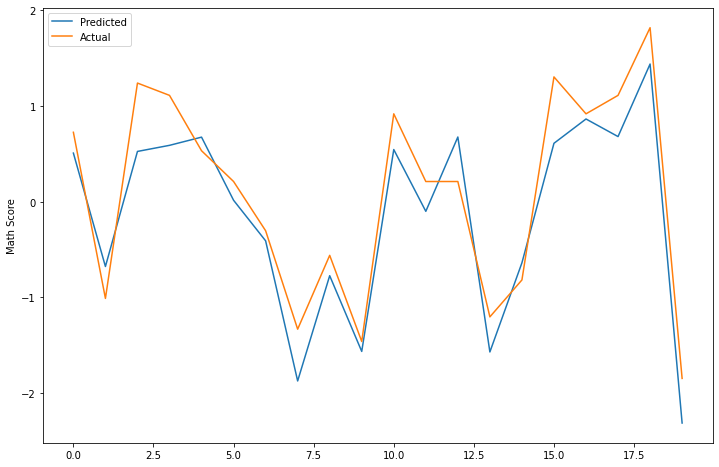

In [104]:
#Lets plot 

fig, ax = plt.subplots(figsize=(12,8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Math Score')
plt.legend()
plt.show()

In [107]:
#predictiong math score without using  any of the other score

X = exam.drop(['math score','reading score','writing score'], axis=1)
Y = exam['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

print('Training score : ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing Score : ', r2_score(y_test, y_pred))

Training score :  0.32897583806879627
Testing Score :  0.2705543228606765


In [108]:
#predictiong math score without using  any of the other score

X = exam.drop(['math score','writing score'], axis=1)
Y = exam['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

print('Training score : ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing Score : ', r2_score(y_test, y_pred))

Training score :  0.8558483852981498
Testing Score :  0.7281666005155509
